# CS485 - Data Science and Applications

  **Homework 3**

  Feel free to ignore the already implemented code and use your own.

# Part a: Exploratory Data Analysis on traffic stop data

The following data are collected by Hatford CT police from October 2013 to September 2016

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/lpoly/public_data/refs/heads/main/hartford_police_data.csv'

# Load data from CSV
data = pd.read_csv(url)
data.head()

,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,...,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,raw_subject_race_code,raw_subject_ethnicity_code,raw_search_authorization_code,raw_intervention_disposition_code
0,1,2013-10-13,15:21:00,LINNMORE ST AT ROGER,41.732189,-72.699760,SOUTH WEST,38.0,hispanic,female,...,citation,NaN,False,False,NaN,Stop Sign,W,H,N,I
1,2,2013-10-24,01:12:00,HAWTHORN STREET @ IMLAY STREET,41.764621,-72.695362,ASYLUM HILL,20.0,black,male,...,citation,NaN,False,False,NaN,Defective Lights,B,N,N,I
2,3,2013-10-26,10:06:00,NEW PARK MIRRILL,41.747837,-72.712933,PARKVILLE,26.0,white,female,...,citation,NaN,False,False,NaN,Traffic Control Signal,W,N,N,I
3,4,2013-10-26,18:06:00,nfew park at merrill st,41.748069,-72.712641,PARKVILLE,26.0,white,female,...,citation,NaN,False,False,NaN,Traffic Control Signal,W,N,N,I
4,5,2013-10-26,19:56:00,SUMMIT ST AT ZION ST,41.753945,-72.693278,FROG HOLLOW,39.0,white,male,...,citation,NaN,False,False,NaN,Stop Sign,W,N,N,I


## Examples of EDA

A visualization of the trend of traffic stops in Hartford, CT, from October 2013 to September 2016. The plot shows the daily counts of traffic stops over time, allowing us to analyze patterns, seasonal trends, or anomalies.

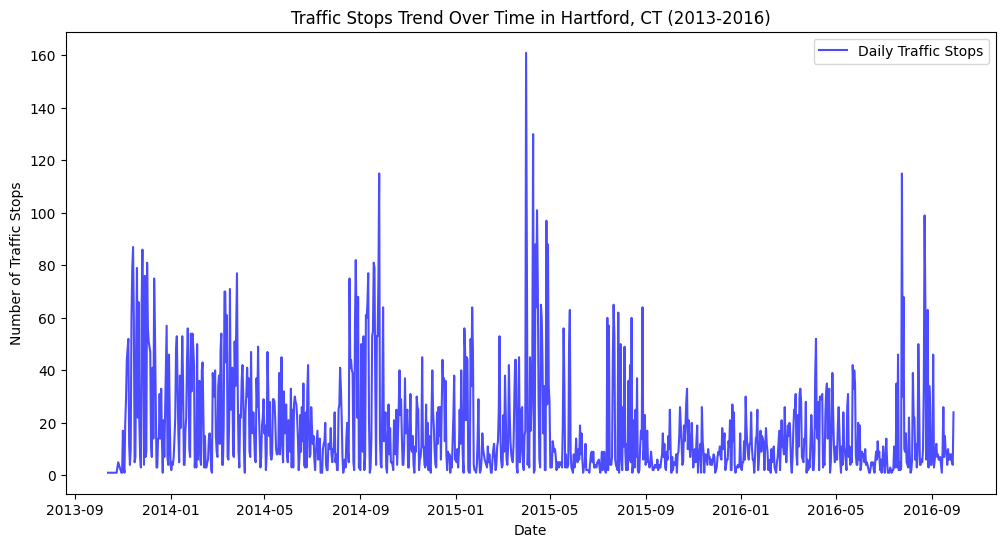

In [2]:
import matplotlib.pyplot as plt

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Group by date to count the number of stops per day
daily_stops = data.groupby('date').size()

# Plot the trend over time
plt.figure(figsize=(12, 6))
plt.plot(daily_stops.index, daily_stops.values, label='Daily Traffic Stops', color='blue', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Number of Traffic Stops')
plt.title('Traffic Stops Trend Over Time in Hartford, CT (2013-2016)')
plt.legend()
plt.show()

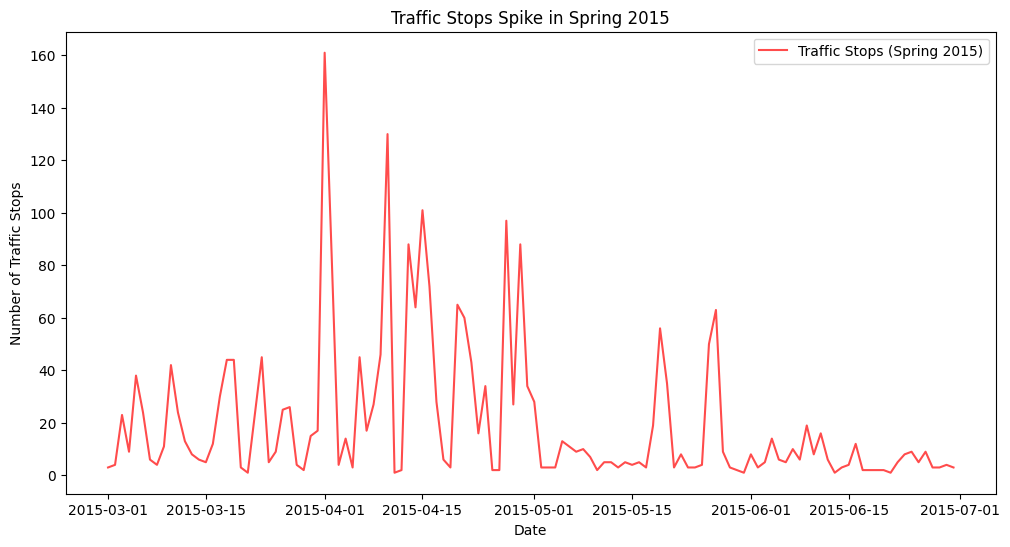

,0
date,
2015-04-01,161
2015-04-10,130
2015-04-15,101
2015-04-27,97
2015-04-29,88
2015-04-13,88
2015-04-02,84
2015-04-16,72
2015-04-20,65


In [3]:
# Zoom in on the spike around spring 2015
spring_2015 = daily_stops['2015-03':'2015-06']

# Plot the spike in traffic stops
plt.figure(figsize=(12, 6))
plt.plot(spring_2015.index, spring_2015.values, label='Traffic Stops (Spring 2015)', color='red', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Number of Traffic Stops')
plt.title('Traffic Stops Spike in Spring 2015')
plt.legend()
plt.show()

# Checking the top dates with the highest number of stops
spring_2015.sort_values(ascending=False).head(10)

The spike in traffic stops in Spring 2015 appears to be concentrated around April, with April 1st having the highest number of stops (161), followed by several other high-count days throughout the month. We can search factors responsible for this increase with a quick [google search](https://portal.ct.gov/dot/ctdot-press-releases/2015/connecticut-law-enforcement-to-begin-major-crackdown-on-texting-while-driving?language=en_US).




In [ ]:
import folium
from folium.plugins import MarkerCluster

if 'lat' in data.columns and 'lng' in data.columns:
    # Create a base map centered around Hartford, CT
    hartford_map = folium.Map(location=[41.7658, -72.6734], zoom_start=12)

    marker_cluster = MarkerCluster().add_to(hartford_map)

    # Add points to the map
    for _, row in data.dropna(subset=['lat', 'lng']).iterrows():
        folium.Marker(
            location=[row['lat'], row['lng']],
            popup=f"Citation issued: {row['citation_issued']}",
            icon=folium.Icon(color="blue", icon="info-sign")
        ).add_to(marker_cluster)

In [ ]:
hartford_map

## Temporal Analysis

#### 1. Traffic Stops by Day of the Week
- Extract the **day of the week** from the `date` column.
- Count the number of stops for each day.
- Plot a **bar chart** where:
  - The x-axis represents the **days of the week** (ordered from Monday to Sunday).
  - The y-axis represents the **number of traffic stops**.
  - The title of the plot should be **"Traffic Stops by Day of the Week"**.
  - Rotate the x-axis labels for readability.

In [6]:
##################
# YOUR CODE HERE #
##################

#### 2. Traffic Stops Heatmap (Hour vs. Day of the Week)
- Extract the **hour** from the `time` column.
- Create a **heatmap** where:
  - The x-axis represents the **hours of the day** (0-23).
  - The y-axis represents the **days of the week** (ordered from Monday to Sunday).
  - The color intensity represents the **number of traffic stops**.
  - Use an appropriate colormap (e.g., `"YlGnBu"`) to visualize the frequency.
  - Set an informative title: **"Traffic Stops Heatmap (Hour vs. Day of the Week)"**.

In [7]:
##################
# YOUR CODE HERE #
##################

## Demographic Analysis

#### 1. Traffic Stops by Race and Gender
- Extract the **subject_race** and **subject_sex** columns.
- Count the number of stops for each racial group, separated by gender.
- Create a **bar chart** where:
  - The x-axis represents **race**.
  - The y-axis represents **number of stops**.
  - Different bar colors distinguish between **male and female**.
  - Use an appropriate title: **"Traffic Stops by Race and Gender"**.

In [8]:
##################
# YOUR CODE HERE #
##################

#### 2. Traffic Stop Outcomes by Race
- Extract the **subject_race** and **outcome** columns.
- Plot a **stacked histogram** where:
  - The x-axis represents **race**.
  - The y-axis represents **number of stops**.
  - The different colors represent **outcome categories** (citation, warning, arrest).
  - Use an appropriate title: **"Traffic Stop Outcomes by Race"**.

In [9]:
##################
# YOUR CODE HERE #
##################

#### 3. Age Distribution of Stopped Individuals
- Extract the **subject_age** column.
- Plot a **histogram** where:
  - The x-axis represents **age**.
  - The y-axis represents **number of stops**.
  - Include a **Kernel Density Estimate (KDE)** to show the distribution trend.
  - Use an appropriate title: **"Age Distribution of Stopped Individuals"**.


In [10]:
##################
# YOUR CODE HERE #
##################

- Plot a **boxplot** of the age distribution.

In [11]:
##################
# YOUR CODE HERE #
##################

- Plot a **violinplot** of the age distribution.

In [12]:
##################
# YOUR CODE HERE #
##################

- Report mean, median, min, max, standard deviation

In [13]:
##################
# YOUR CODE HERE #
##################

#### 4. Traffic Stops by Race and Gender
- Extract the **subject_race** and **subject_sex** columns.
- Count the number of stops for each racial group, separated by gender.
- Create a **bar chart** where:
  - The x-axis represents **race**.
  - The y-axis represents **number of stops**.
  - Different bar colors distinguish between **male and female**.
  - Use an appropriate title: **"Traffic Stops by Race and Gender"**.

In [14]:
##################
# YOUR CODE HERE #
##################

# Part b: MLE

Use the [sklearn Breast Cancer Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) and pick a feature to analyze that you think is likely to be generated from an underlying Gaussian. That means you will be assuming that the distribution of the feature you choose is coming from a Gaussian parametrized by the vector:

\begin{equation}
\vec{\theta} = [\mu, \sigma]
\end{equation}

In [15]:
##################
# YOUR CODE HERE #
##################

Approximate the parameters of the $\theta$ vector by minimizing the negative log-likelihood function using Gradient Descent and compare your results. Anallytically compute the derivative. Include your calculations in a markdown cell using $\LaTeX$.

In [16]:
##################
# YOUR CODE HERE #
##################